#### Step 1: Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn import svm
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


#### Step 2: Load the dataset

In [2]:
df = pd.read_csv("Disease_Symptoms.csv")

#### Step 3: Exploratory Data Analysis and data Preprocessing

In [3]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
4,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,GERD


In [4]:
df.shape

(3550, 133)

In [5]:
df.size

472150

In [6]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 3.6+ MB


In [8]:
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

#### Step 4: Divide the datasets into input and output

In [9]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [10]:
df.shape

(3550, 133)

In [11]:
# Last column are consider as input
X.shape

(3550, 132)

In [12]:
# Only last column is target
y.shape

(3550,)

In [13]:
df.prognosis.unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Migraine', 'Cervical spondylosis',
       'Paralysis (brain hemorrhage)', 'Jaundice', 'Malaria',
       'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A', 'Hepatitis B',
       'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Alcoholic hepatitis',
       'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo',
       'Bronchial Asthma', 'Hypertension '], dtype=object)

In [14]:
df['prognosis'].value_counts

<bound method IndexOpsMixin.value_counts of 0                              Fungal infection
1                              Fungal infection
2                                       Allergy
3                                       Allergy
4                                          GERD
                         ...                   
3545                            Hyperthyroidism
3546                               Hypoglycemia
3547                            Osteoarthristis
3548                                  Arthritis
3549    (vertigo) Paroymsal  Positional Vertigo
Name: prognosis, Length: 3550, dtype: object>

In [15]:
# Checking whether the dataset is balanced or not
disease_counts = df["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
 
print(temp_df['Disease'], " and ",temp_df['Counts'])

0                                Heart attack
1                Dimorphic hemmorhoids(piles)
2                                 Hepatitis E
3                         Alcoholic hepatitis
4                                Tuberculosis
5                                 Hepatitis B
6                                 Hepatitis C
7                                   Pneumonia
8                                 Common Cold
9                                 Hepatitis D
10                                  Arthritis
11                             Hypothyroidism
12                             Varicose veins
13                               Hypoglycemia
14                            Osteoarthristis
15                                hepatitis A
16                            Hyperthyroidism
17    (vertigo) Paroymsal  Positional Vertigo
18                                     Dengue
19                                       Acne
20                                    Typhoid
21                                

#### Step 5: Divide the datasets into training and testing

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
print(df.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3550, 133)
(2840, 132)
(710, 132)
(2840,)
(710,)


#### Step 6:  Suppose vector machine

###### Build and train the models using SVM

In [18]:
svmodel1 = svm.SVC(kernel='linear')
svmodel2 = svm.SVC(kernel='poly')
svmodel3 = svm.SVC(kernel='rbf')

In [19]:
svmodel1.fit(X_train,y_train)
svmodel2.fit(X_train,y_train)
svmodel3.fit(X_train,y_train)

SVC()

##### Do the prediction of SVM models

In [20]:
y_pred1 = svmodel1.predict(X_test)
y_pred2 = svmodel2.predict(X_test)
y_pred3 = svmodel3.predict(X_test)

##### Evalute the SVM models

In [21]:
print("Model 1 accuracy: ",metrics.accuracy_score(y_pred1, y_test))
print("Model 2 accuracy: ",metrics.accuracy_score(y_pred2, y_test))
print("Model 3 accuracy: ",metrics.accuracy_score(y_pred3, y_test))

Model 1 accuracy:  1.0
Model 2 accuracy:  0.9887323943661972
Model 3 accuracy:  1.0


#### Step 7: Naive Bayes

##### Build and train the model using Naive Bayes

In [22]:
nbmodel = GaussianNB()

In [23]:
nbmodel.fit(X_train, y_train)

GaussianNB()

In [24]:
nbmodel.score(X_test, y_test)

1.0

##### Do the prediction of Naive Bayes model

In [25]:
y_pred4 = nbmodel.predict(X_test)

##### Evalute the Naive bayes model

In [26]:
print('Accuracy Score on test data: ',accuracy_score(y_true=y_test, y_pred=y_pred4))

Accuracy Score on test data:  1.0


#### Step 8: Logistic Regression

#####  Build and train the model using Logistic Regression

In [27]:
lrmodel = LogisticRegression()

In [28]:
lrmodel.fit(X_train, y_train)

LogisticRegression()

#####  Do the prediction of Logistic Regression model

In [29]:
y_pred5 = lrmodel.predict(X_test)

In [30]:
y_pred5

array(['Hypothyroidism', 'Heart attack', 'Heart attack', 'Hepatitis D',
       'Dengue', '(vertigo) Paroymsal  Positional Vertigo', 'Pneumonia',
       'Hepatitis B', 'Tuberculosis', 'Hyperthyroidism', 'Dengue',
       'Hyperthyroidism', 'Hypothyroidism', 'Hepatitis E',
       'Dimorphic hemmorhoids(piles)', 'Hyperthyroidism', 'Acne',
       'Jaundice', 'Pneumonia', 'Paralysis (brain hemorrhage)',
       'Migraine', 'Typhoid', 'Malaria', 'Hypothyroidism', 'Common Cold',
       'Hepatitis B', 'Psoriasis', 'Pneumonia', 'Urinary tract infection',
       'Common Cold', 'Heart attack', 'Acne',
       'Dimorphic hemmorhoids(piles)', 'Arthritis', 'Fungal infection',
       'Malaria', 'Cervical spondylosis', 'Hepatitis D', 'Hepatitis E',
       'Hepatitis C', 'Pneumonia', 'Hepatitis C', 'Gastroenteritis',
       'Psoriasis', 'Acne', 'Cervical spondylosis', 'Acne',
       'Alcoholic hepatitis', 'Hepatitis C', 'Alcoholic hepatitis',
       'Hypoglycemia', 'Paralysis (brain hemorrhage)', 'Hyperth

In [31]:
y_test

array(['Hypothyroidism', 'Heart attack', 'Heart attack', 'Hepatitis D',
       'Dengue', '(vertigo) Paroymsal  Positional Vertigo', 'Pneumonia',
       'Hepatitis B', 'Tuberculosis', 'Hyperthyroidism', 'Dengue',
       'Hyperthyroidism', 'Hypothyroidism', 'Hepatitis E',
       'Dimorphic hemmorhoids(piles)', 'Hyperthyroidism', 'Acne',
       'Jaundice', 'Pneumonia', 'Paralysis (brain hemorrhage)',
       'Migraine', 'Typhoid', 'Malaria', 'Hypothyroidism', 'Common Cold',
       'Hepatitis B', 'Psoriasis', 'Pneumonia', 'Urinary tract infection',
       'Common Cold', 'Heart attack', 'Acne',
       'Dimorphic hemmorhoids(piles)', 'Arthritis', 'Fungal infection',
       'Malaria', 'Cervical spondylosis', 'Hepatitis D', 'Hepatitis E',
       'Hepatitis C', 'Pneumonia', 'Hepatitis C', 'Gastroenteritis',
       'Psoriasis', 'Acne', 'Cervical spondylosis', 'Acne',
       'Alcoholic hepatitis', 'Hepatitis C', 'Alcoholic hepatitis',
       'Hypoglycemia', 'Paralysis (brain hemorrhage)', 'Hyperth

In [32]:
lrmodel.score(X_test,y_test)

1.0

In [33]:
print('Accuracy Score on test data: ',accuracy_score(y_true=y_test, y_pred=y_pred5))

Accuracy Score on test data:  1.0


#### Step 9: K-Nearest Neighbor

##### Choosing best value for K

In [34]:
error_rate = []

for i in range(1,10):
    knnmodel = KNeighborsClassifier(n_neighbors=i)
    knnmodel.fit(X_train,y_train)
    pred_i = knnmodel.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [35]:
error_rate
# here error rate is zero for all the k values, we can take any value for k

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

##### Build and train the model using K-nearest neighbor

In [36]:
knnmodel = KNeighborsClassifier(n_neighbors=3)

In [37]:
knnmodel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

##### Do the prediction of KNN model

In [38]:
y_pred = knnmodel.predict(X_test)

In [39]:
y_test

array(['Hypothyroidism', 'Heart attack', 'Heart attack', 'Hepatitis D',
       'Dengue', '(vertigo) Paroymsal  Positional Vertigo', 'Pneumonia',
       'Hepatitis B', 'Tuberculosis', 'Hyperthyroidism', 'Dengue',
       'Hyperthyroidism', 'Hypothyroidism', 'Hepatitis E',
       'Dimorphic hemmorhoids(piles)', 'Hyperthyroidism', 'Acne',
       'Jaundice', 'Pneumonia', 'Paralysis (brain hemorrhage)',
       'Migraine', 'Typhoid', 'Malaria', 'Hypothyroidism', 'Common Cold',
       'Hepatitis B', 'Psoriasis', 'Pneumonia', 'Urinary tract infection',
       'Common Cold', 'Heart attack', 'Acne',
       'Dimorphic hemmorhoids(piles)', 'Arthritis', 'Fungal infection',
       'Malaria', 'Cervical spondylosis', 'Hepatitis D', 'Hepatitis E',
       'Hepatitis C', 'Pneumonia', 'Hepatitis C', 'Gastroenteritis',
       'Psoriasis', 'Acne', 'Cervical spondylosis', 'Acne',
       'Alcoholic hepatitis', 'Hepatitis C', 'Alcoholic hepatitis',
       'Hypoglycemia', 'Paralysis (brain hemorrhage)', 'Hyperth

In [40]:
y_pred

array(['Hypothyroidism', 'Heart attack', 'Heart attack', 'Hepatitis D',
       'Dengue', '(vertigo) Paroymsal  Positional Vertigo', 'Pneumonia',
       'Hepatitis B', 'Tuberculosis', 'Hyperthyroidism', 'Dengue',
       'Hyperthyroidism', 'Hypothyroidism', 'Hepatitis E',
       'Dimorphic hemmorhoids(piles)', 'Hyperthyroidism', 'Acne',
       'Jaundice', 'Pneumonia', 'Paralysis (brain hemorrhage)',
       'Migraine', 'Typhoid', 'Malaria', 'Hypothyroidism', 'Common Cold',
       'Hepatitis B', 'Psoriasis', 'Pneumonia', 'Urinary tract infection',
       'Common Cold', 'Heart attack', 'Acne',
       'Dimorphic hemmorhoids(piles)', 'Arthritis', 'Fungal infection',
       'Malaria', 'Cervical spondylosis', 'Hepatitis D', 'Hepatitis E',
       'Hepatitis C', 'Pneumonia', 'Hepatitis C', 'Gastroenteritis',
       'Psoriasis', 'Acne', 'Cervical spondylosis', 'Acne',
       'Alcoholic hepatitis', 'Hepatitis C', 'Alcoholic hepatitis',
       'Hypoglycemia', 'Paralysis (brain hemorrhage)', 'Hyperth

##### Evalute the KNN model

In [41]:
print(confusion_matrix(y_test,y_pred))

[[25  0  0 ...  0  0  0]
 [ 0  3  0 ...  0  0  0]
 [ 0  0 27 ...  0  0  0]
 ...
 [ 0  0  0 ... 18  0  0]
 [ 0  0  0 ...  0 16  0]
 [ 0  0  0 ...  0  0 21]]


In [42]:
print(classification_report(y_pred,y_test))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        25
                                   AIDS       1.00      1.00      1.00         3
                                   Acne       1.00      1.00      1.00        27
                    Alcoholic hepatitis       1.00      1.00      1.00        21
                              Arthritis       1.00      1.00      1.00        21
                       Bronchial Asthma       1.00      1.00      1.00         8
                   Cervical spondylosis       1.00      1.00      1.00        21
                            Chicken pox       1.00      1.00      1.00        16
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00        20
                                 Dengue       1.00      1.00      1.00        21
                           

#### Step 10: Decision tree

##### Build and train the model using Decision Tree

In [43]:
dtmodel = DecisionTreeClassifier()

In [44]:
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier()

##### Do the prediction of Decision tree model

In [45]:
y_pred6 = dtmodel.predict(X_test)

In [46]:
y_pred6

array(['Hypothyroidism', 'Heart attack', 'Heart attack', 'Hepatitis D',
       'Dengue', '(vertigo) Paroymsal  Positional Vertigo', 'Pneumonia',
       'Hepatitis B', 'Tuberculosis', 'Hyperthyroidism', 'Dengue',
       'Hyperthyroidism', 'Hypothyroidism', 'Hepatitis E',
       'Dimorphic hemmorhoids(piles)', 'Hyperthyroidism', 'Acne',
       'Jaundice', 'Pneumonia', 'Paralysis (brain hemorrhage)',
       'Migraine', 'Typhoid', 'Malaria', 'Hypothyroidism', 'Common Cold',
       'Hepatitis B', 'Psoriasis', 'Pneumonia', 'Urinary tract infection',
       'Common Cold', 'Heart attack', 'Acne',
       'Dimorphic hemmorhoids(piles)', 'Arthritis', 'Fungal infection',
       'Malaria', 'Cervical spondylosis', 'Hepatitis D', 'Hepatitis E',
       'Hepatitis C', 'Pneumonia', 'Hepatitis C', 'Gastroenteritis',
       'Psoriasis', 'Acne', 'Cervical spondylosis', 'Acne',
       'Alcoholic hepatitis', 'Hepatitis C', 'Alcoholic hepatitis',
       'Hypoglycemia', 'Paralysis (brain hemorrhage)', 'Hyperth

In [47]:
y_test

array(['Hypothyroidism', 'Heart attack', 'Heart attack', 'Hepatitis D',
       'Dengue', '(vertigo) Paroymsal  Positional Vertigo', 'Pneumonia',
       'Hepatitis B', 'Tuberculosis', 'Hyperthyroidism', 'Dengue',
       'Hyperthyroidism', 'Hypothyroidism', 'Hepatitis E',
       'Dimorphic hemmorhoids(piles)', 'Hyperthyroidism', 'Acne',
       'Jaundice', 'Pneumonia', 'Paralysis (brain hemorrhage)',
       'Migraine', 'Typhoid', 'Malaria', 'Hypothyroidism', 'Common Cold',
       'Hepatitis B', 'Psoriasis', 'Pneumonia', 'Urinary tract infection',
       'Common Cold', 'Heart attack', 'Acne',
       'Dimorphic hemmorhoids(piles)', 'Arthritis', 'Fungal infection',
       'Malaria', 'Cervical spondylosis', 'Hepatitis D', 'Hepatitis E',
       'Hepatitis C', 'Pneumonia', 'Hepatitis C', 'Gastroenteritis',
       'Psoriasis', 'Acne', 'Cervical spondylosis', 'Acne',
       'Alcoholic hepatitis', 'Hepatitis C', 'Alcoholic hepatitis',
       'Hypoglycemia', 'Paralysis (brain hemorrhage)', 'Hyperth

##### Evalute the decision tree model

In [48]:
print('Accuracy Score on test data: ',accuracy_score(y_true=y_test, y_pred=y_pred6))

Accuracy Score on test data:  0.9971830985915493


In [49]:
print(confusion_matrix(y_test,y_pred))

[[25  0  0 ...  0  0  0]
 [ 0  3  0 ...  0  0  0]
 [ 0  0 27 ...  0  0  0]
 ...
 [ 0  0  0 ... 18  0  0]
 [ 0  0  0 ...  0 16  0]
 [ 0  0  0 ...  0  0 21]]


##### Plot the decision tree

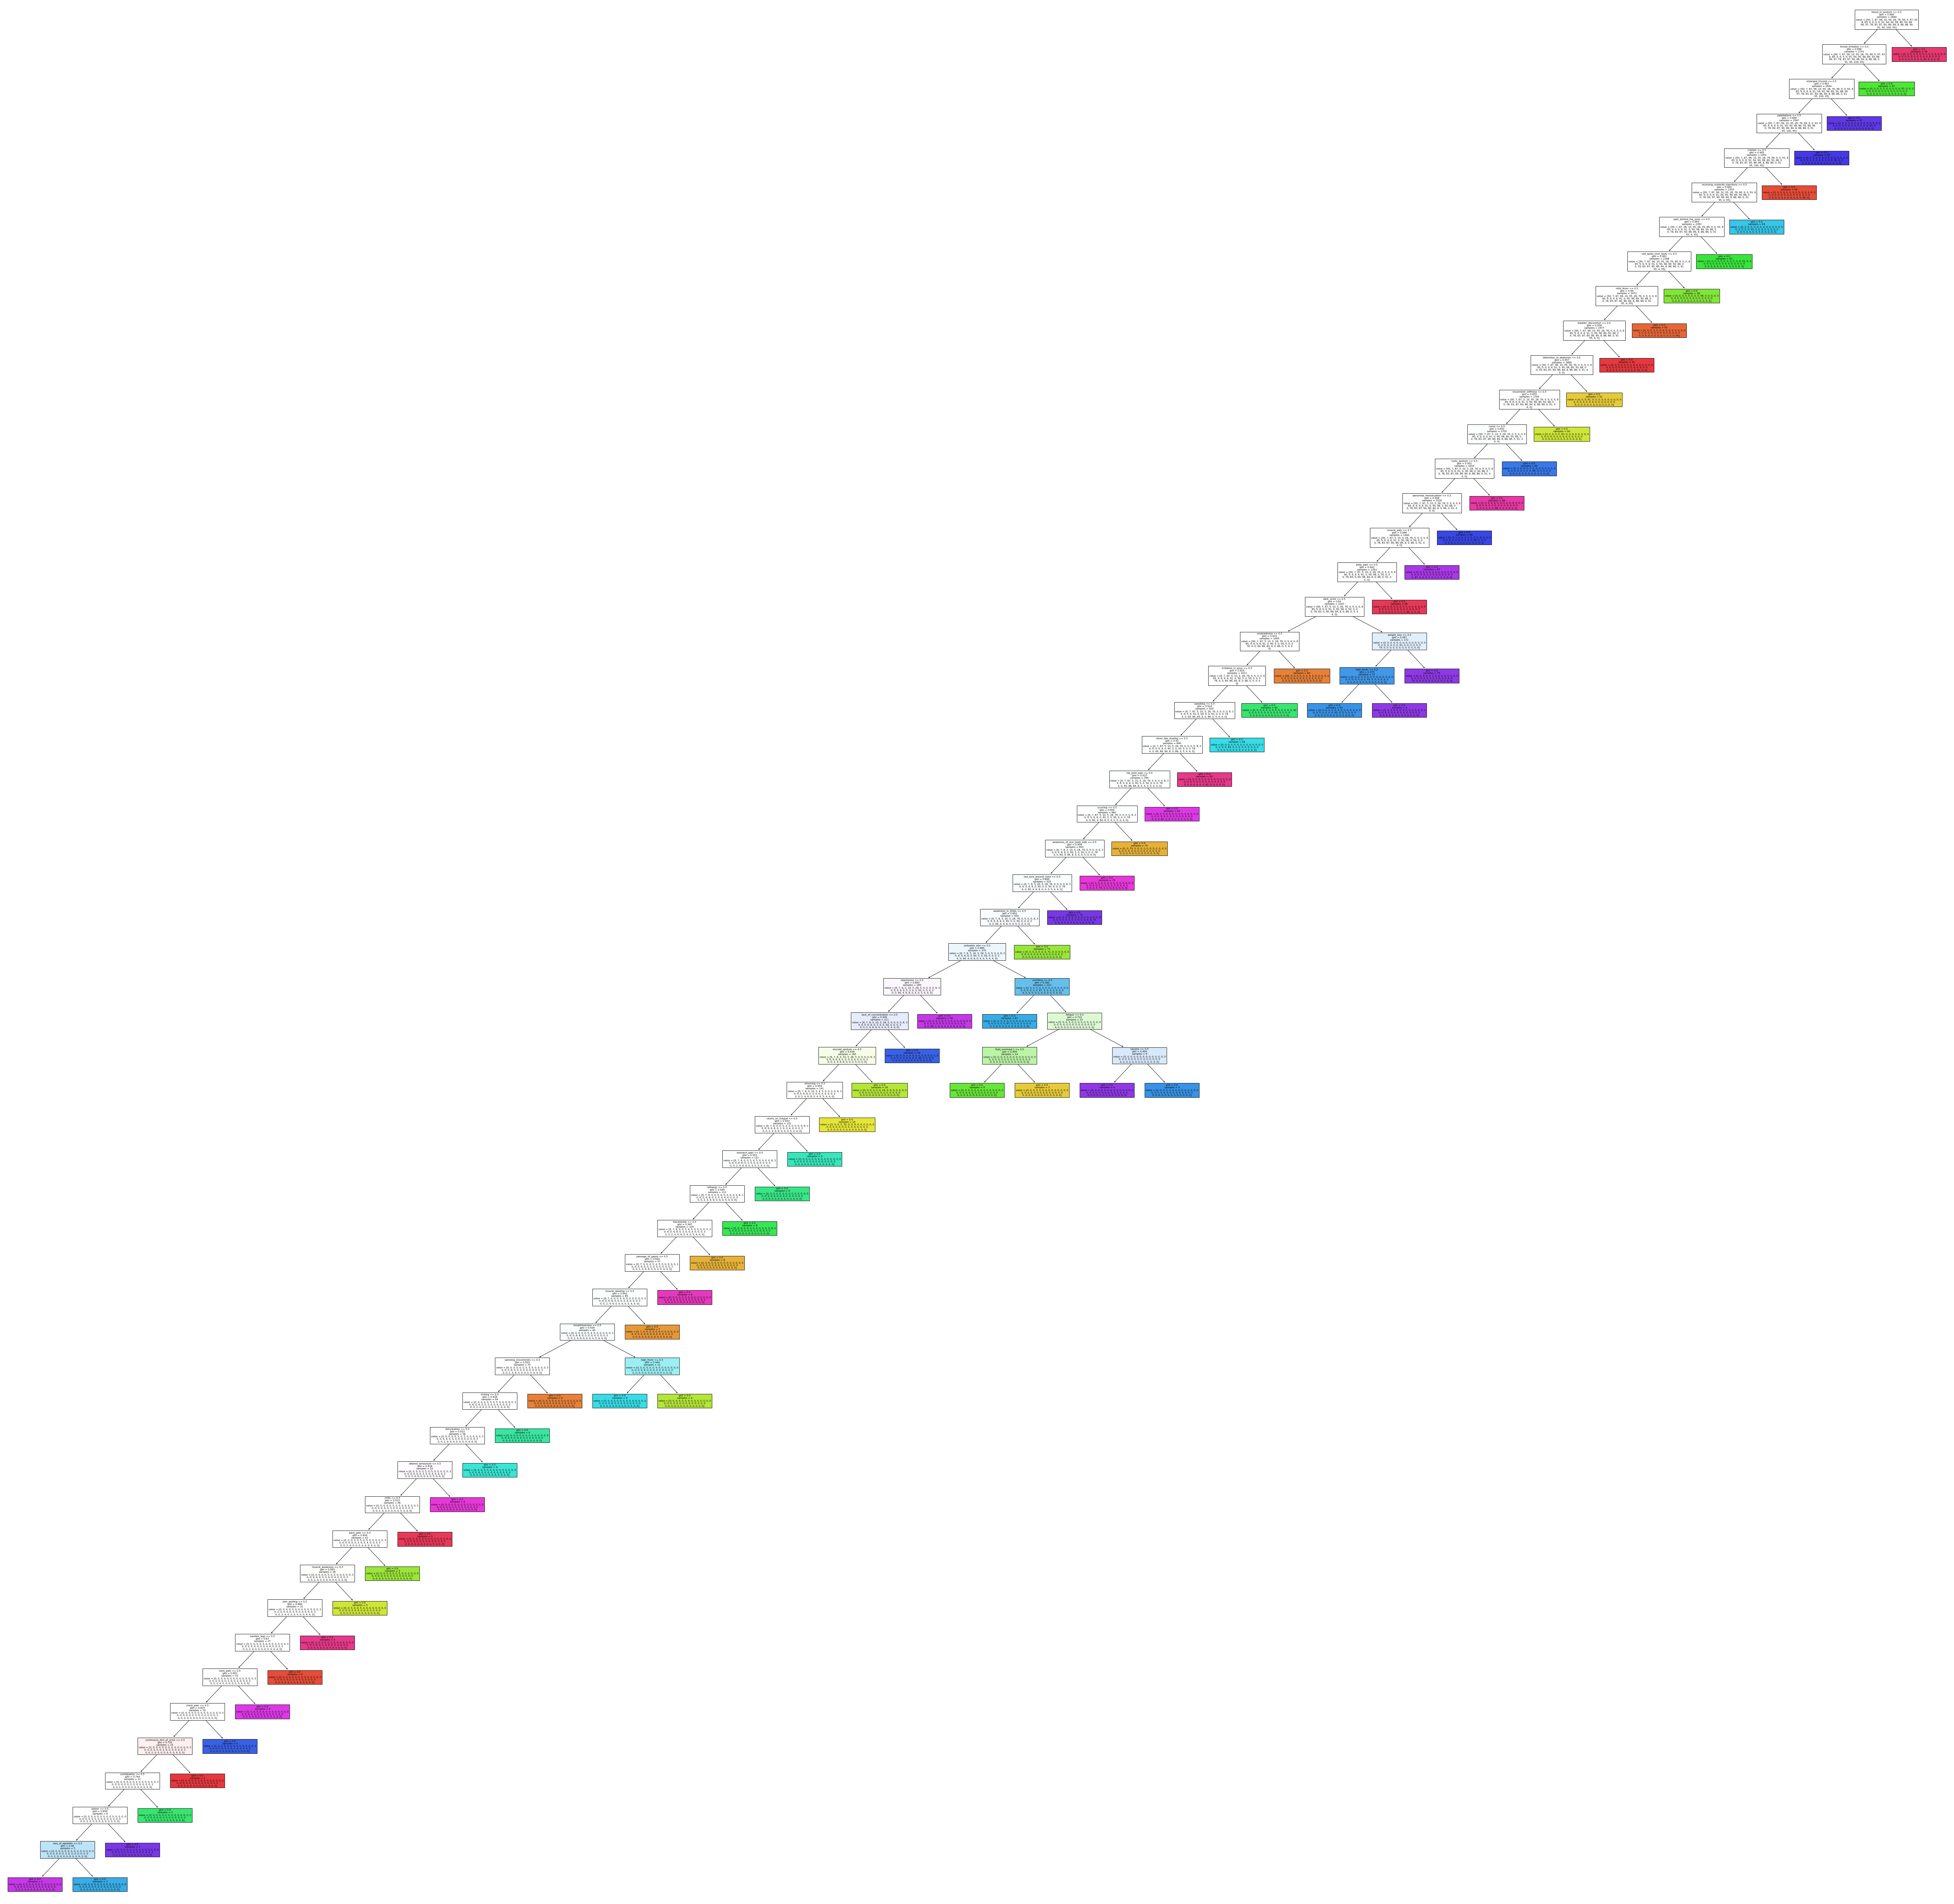

In [50]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(100,100))
# _ underscore it is a variable

_ = tree.plot_tree(
     dtmodel,
    feature_names=df.columns,
    filled =True
)

##### Manually prediction of decision tree model

In [51]:
# prediction for first row in dataset
dtmodel.predict([[1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
]])

array(['Fungal infection'], dtype=object)

In [52]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
4,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,GERD
